# Exploratory Data Analysis


In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

In [247]:
data = pd.read_csv("Paitients_Files_Train.csv")

In [248]:
data.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [249]:
data = pd.read_csv("Paitients_Files_Train.csv",index_col = "ID")

In [250]:
data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
ID,,,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


## 2 . Feature selection

In [251]:
features = ["PRG","PL","PR","SK","TS","M11","BD2","Age"]

### Splitting dataset into X and Y

In [252]:
X = data[features]
y = data["Sepssis"]

In [253]:
X.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
ID,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50
ICU200011,1,85,66,29,0,26.6,0.351,31
ICU200012,8,183,64,0,0,23.3,0.672,32
ICU200013,1,89,66,23,94,28.1,0.167,21
ICU200014,0,137,40,35,168,43.1,2.288,33


In [254]:
y.head()

ID
ICU200010    Positive
ICU200011    Negative
ICU200012    Positive
ICU200013    Negative
ICU200014    Positive
Name: Sepssis, dtype: object

# 3. Exploratory data analysis

In [255]:
corelation = X.corr()

<AxesSubplot:>

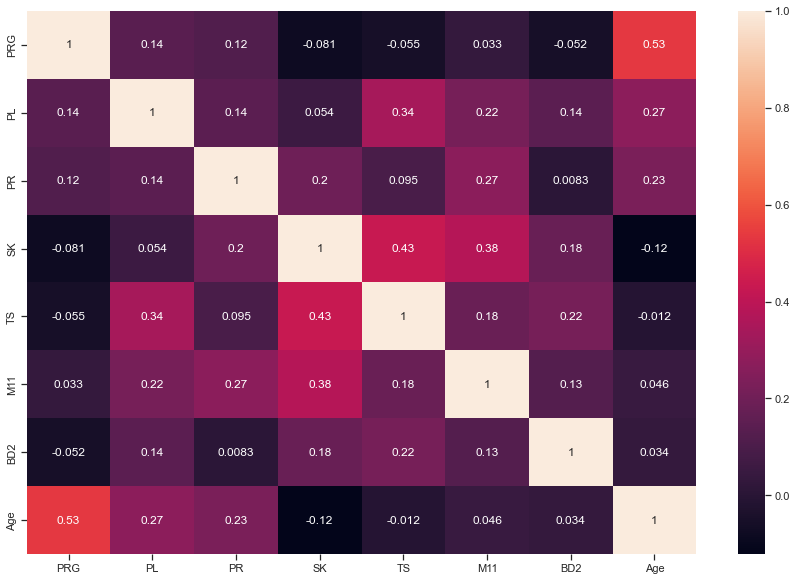

In [256]:
sns.heatmap(corelation, xticklabels = corelation.columns , yticklabels=corelation.columns,annot=True)

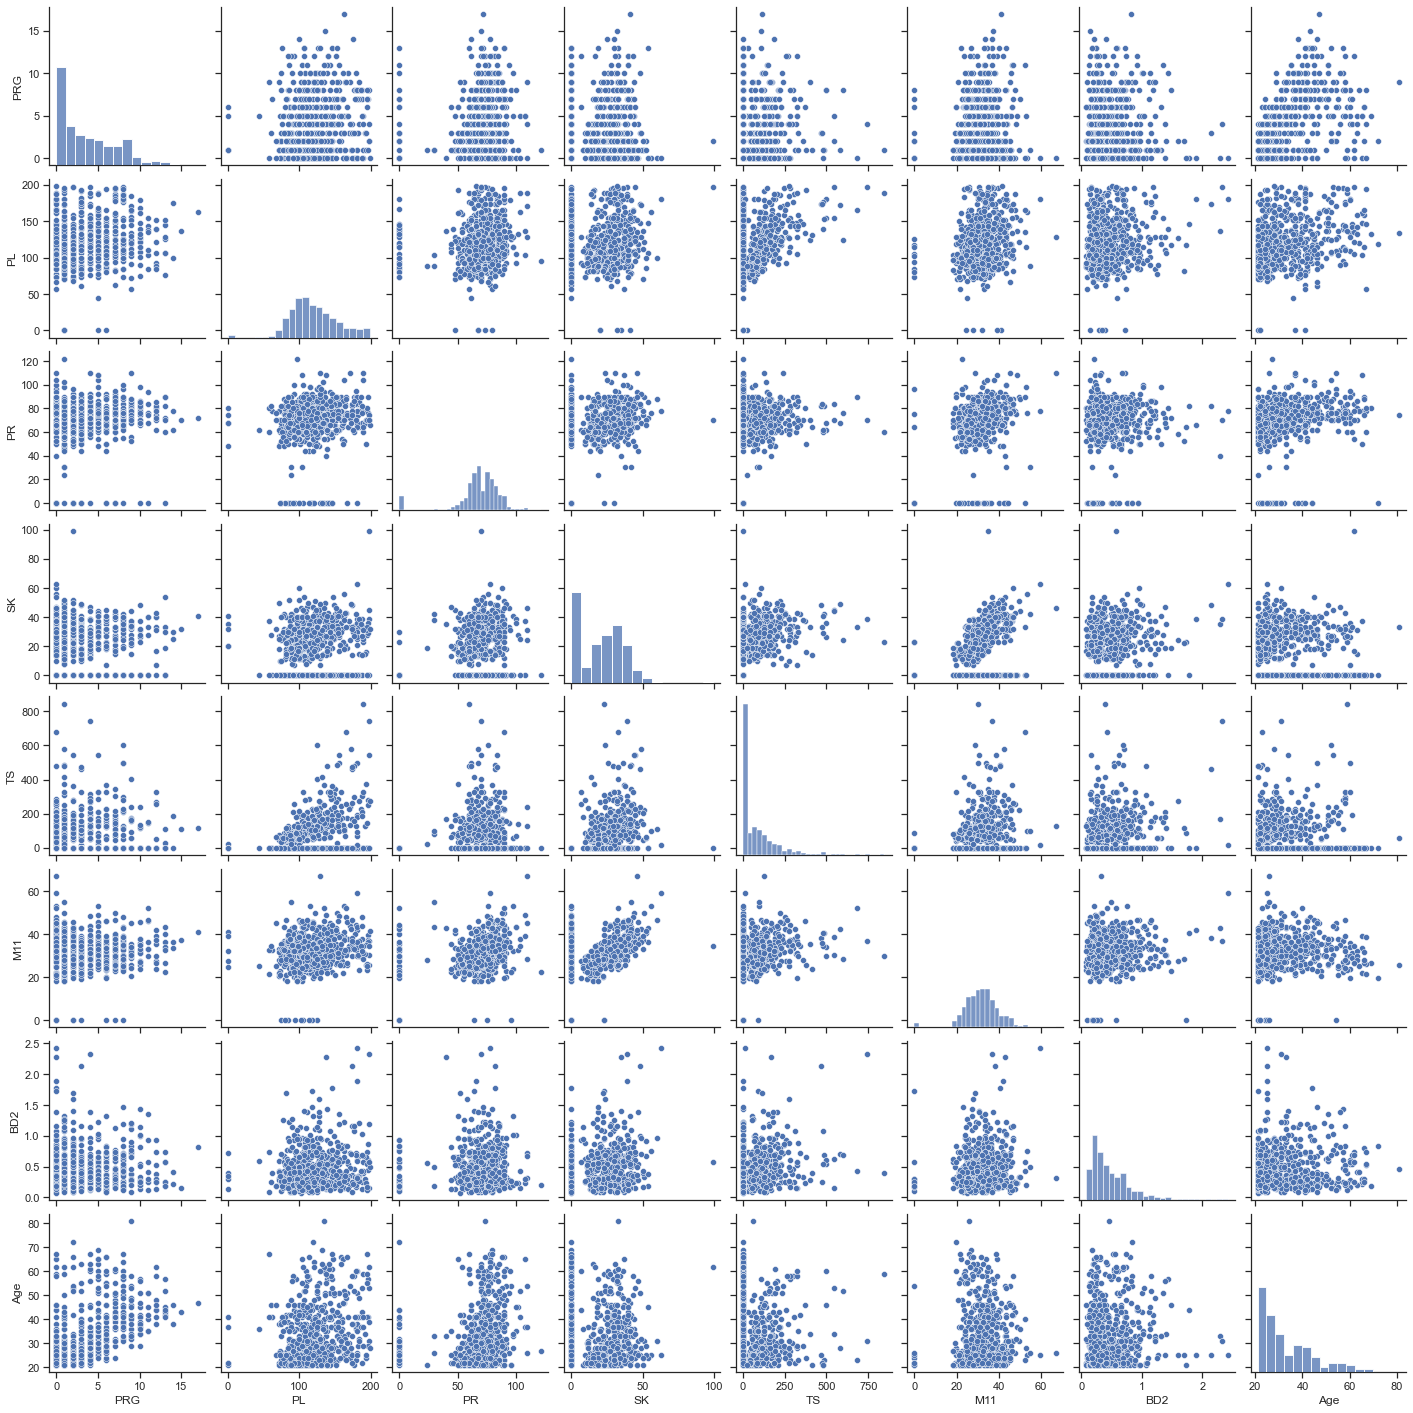

In [257]:
sns.set_theme(style="ticks")
sns.pairplot(X)

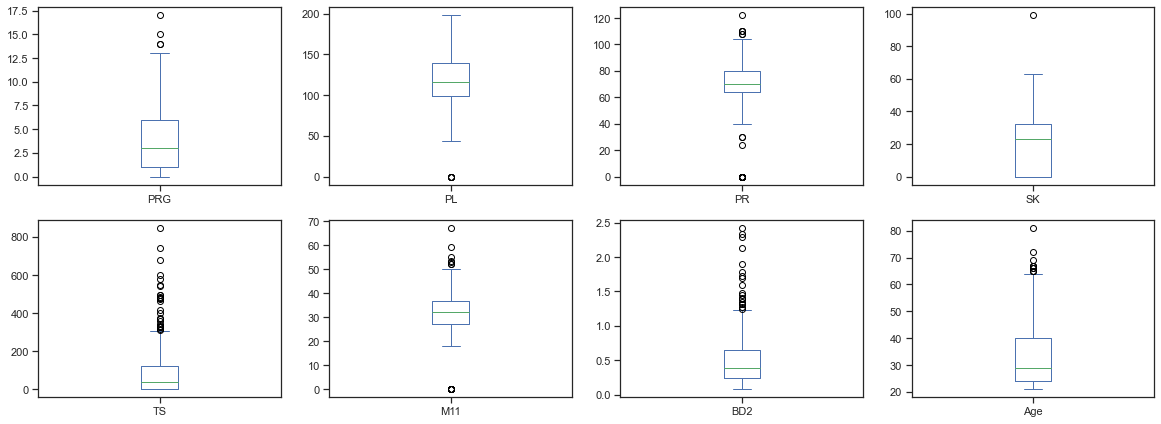

In [258]:
plt.rcParams["figure.figsize"] = (20,15)
X.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
plt.show()

In [259]:
X.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Histogram of each columns

<Figure size 1440x1080 with 0 Axes>

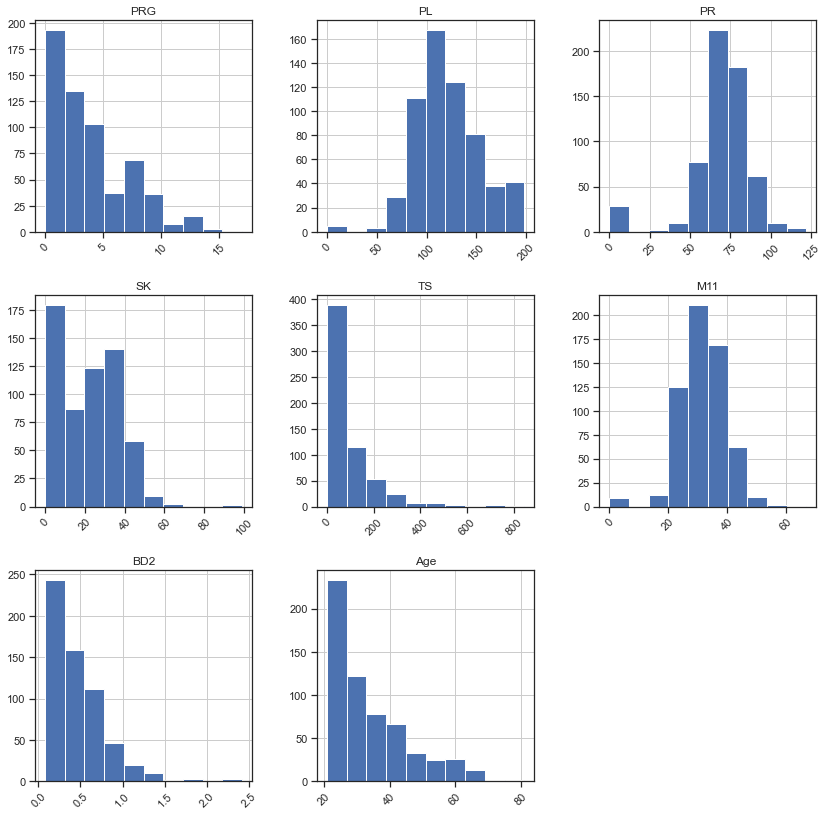

In [274]:
plt.figure()
X.hist(figsize=(14,14), xrot=45)
plt.show()

<AxesSubplot:xlabel='Sepssis', ylabel='PL'>

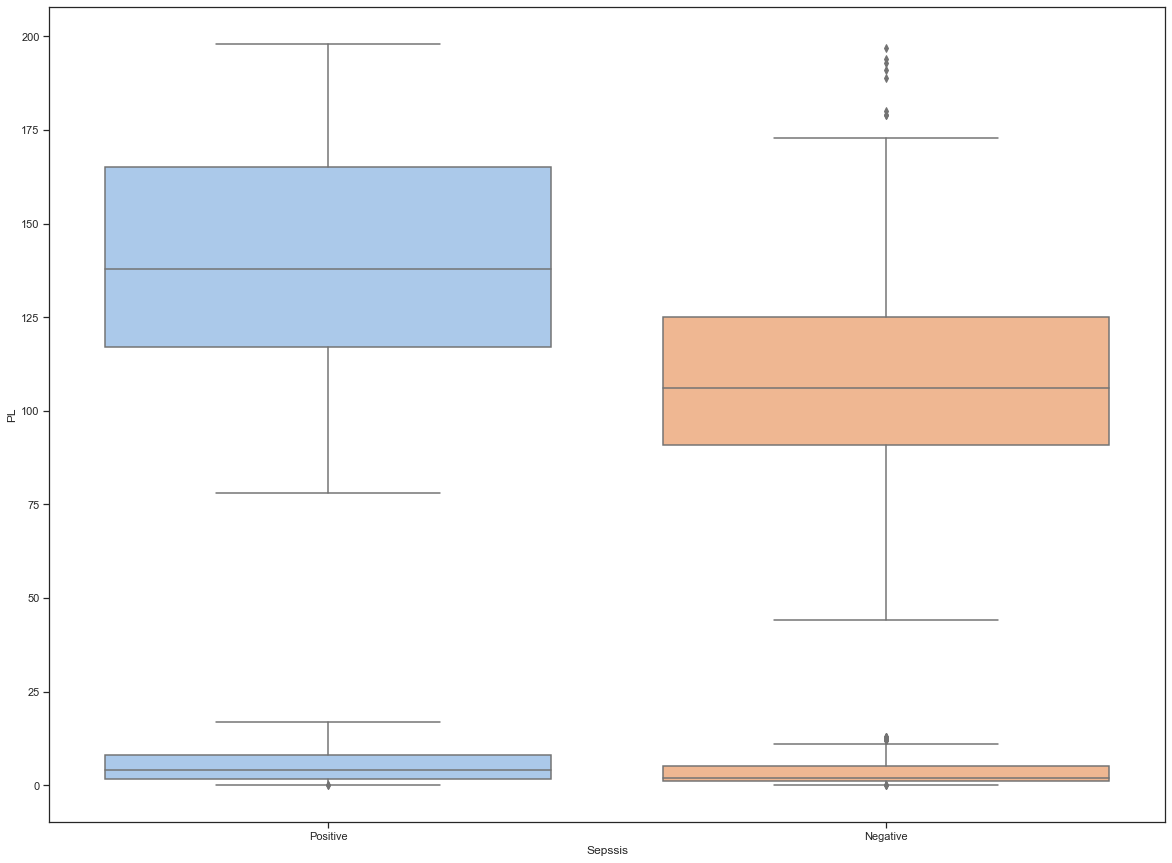

In [302]:
sns.set_theme(style="ticks", palette="pastel")
# Draw a nested boxplot to show bills by day and time
#  ["PRG","PL","PR","SK","TS","M11","BD2","Age"]
sns.boxplot(x=y, y=X["PRG"] )


<AxesSubplot:xlabel='Sepssis', ylabel='PL'>

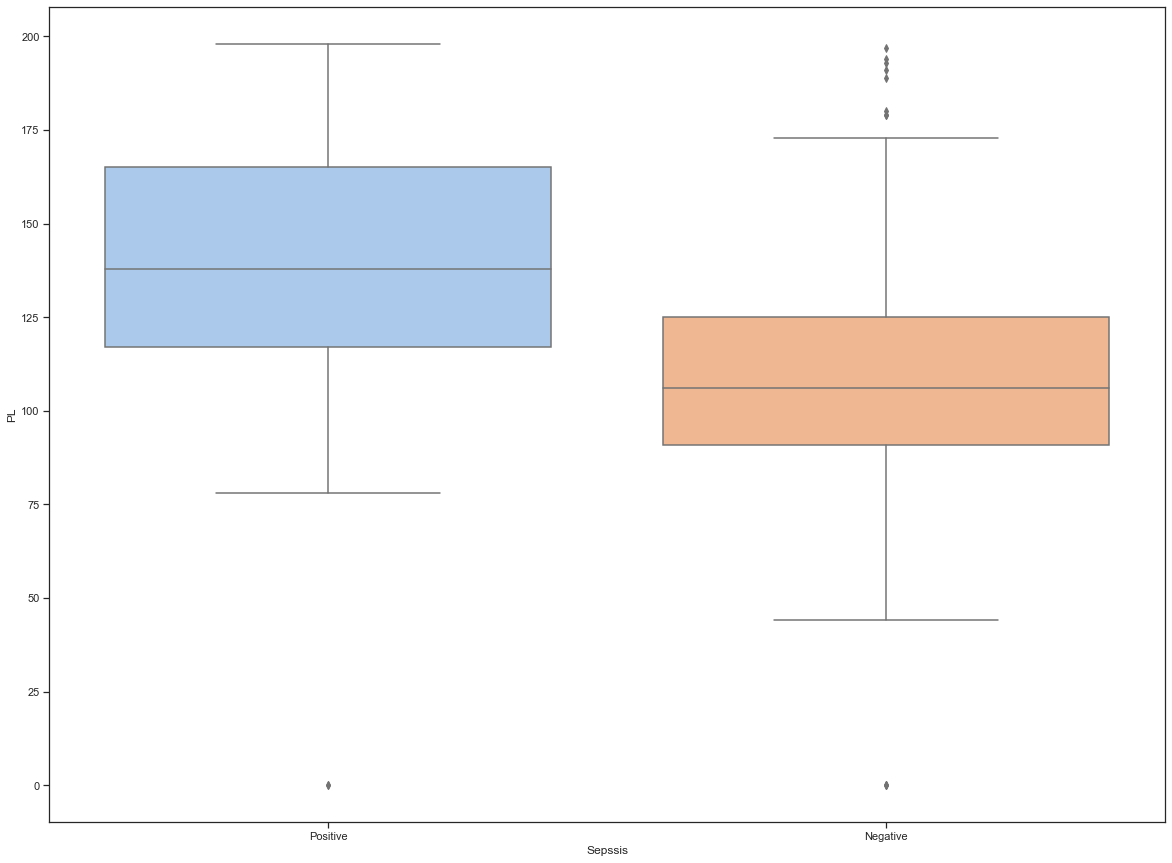

In [303]:
sns.boxplot(x=y, y=X["PL"] )

<AxesSubplot:xlabel='Sepssis', ylabel='PR'>

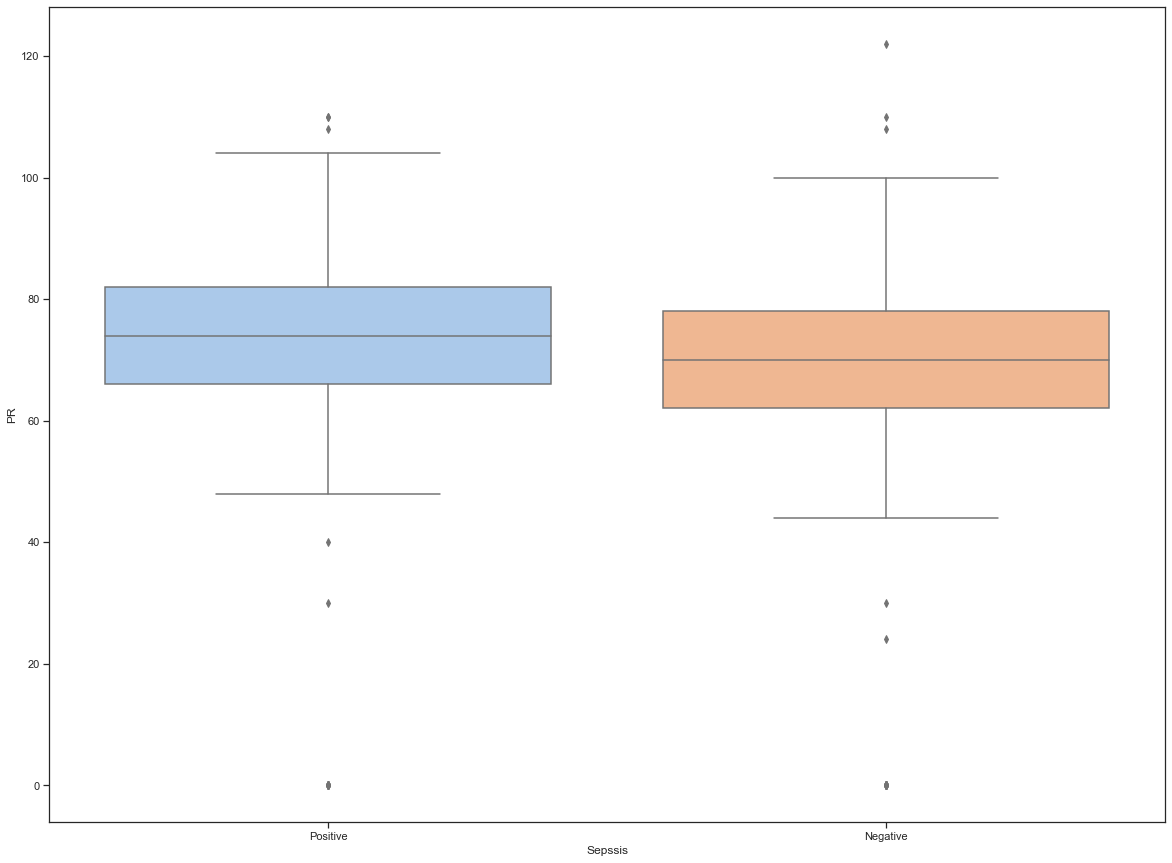

In [304]:
sns.boxplot(x=y, y=X["PR"] )

### X,y -> X_Train, y_train, X_valid, y_valid

In [261]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(X,y , train_size = 0.8 , test_size = 0.2 , random_state=0)

# 4. Traning Machine Learning Model

In [262]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)


In [263]:
lr_model.fit(X_train,y_train)

LogisticRegression(intercept_scaling=10000.0, max_iter=1000000, penalty='l1',
                   solver='liblinear', tol=1e-06, warm_start=True)

In [264]:
print('Test Accuracy:',lr_model.score(X_test,y_test))
print('Train Accuracy:',lr_model.score(X_train,y_train))

Test Accuracy: 0.7833333333333333
Train Accuracy: 0.7828810020876826


In [265]:
y_preds = lr_model.predict(X_test)

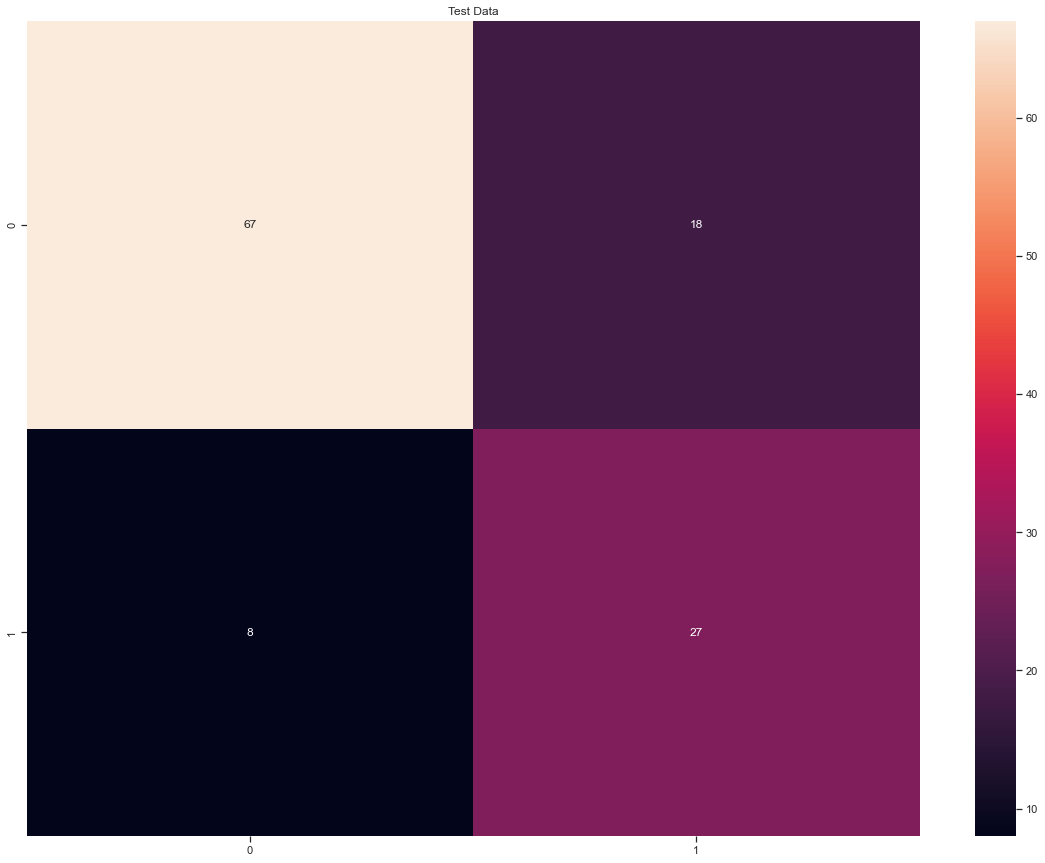

In [266]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
test = confusion_matrix(y_preds,y_test)
plt.title('Test Data')
sns.heatmap(data=test,annot=True,fmt='g')
plt.show()

## Decision Trees 

In [267]:
from sklearn import tree
# old method
# decision_tree = tree.DecisionTreeClassifier(splitter='best',
#                                        max_depth=6 ,criterion="gini")
decision_tree = tree.DecisionTreeClassifier(splitter='random',
                                       max_depth=6 ,criterion="entropy")
decision_tree = decision_tree.fit(X_train, y_train)

In [268]:
print('Test Accuracy:',decision_tree.score(X_test,y_test))
print('Train Accuracy:',decision_tree.score(X_train,y_train))

Test Accuracy: 0.75
Train Accuracy: 0.8288100208768268


In [269]:
y_preds = decision_tree.predict(X_test)

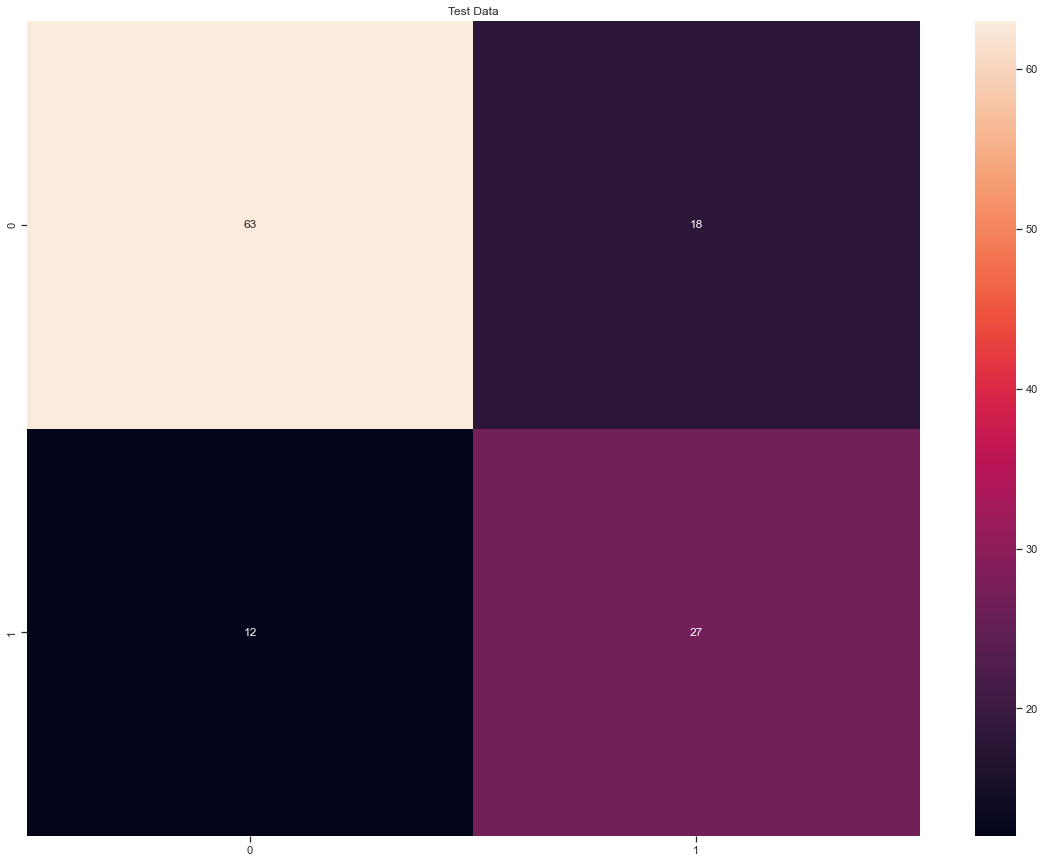

In [270]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
test = confusion_matrix(y_preds,y_test)
plt.title('Test Data')
sns.heatmap(data=test,annot=True,fmt='g')
plt.show()

Dự báo bệnh bị nhưng thực ko : 11
Dự báo ko bị nhung bị :34

In [271]:
from sklearn.metrics import f1_score, accuracy_score
lMaxIter = [2,5,10,50,100,250,1000,10000,100000,1000000,10000000]
lF1Score = []
lAccuracyScore = []

In [272]:
for maxIter in lMaxIter:
    currLogRegNba = LogisticRegression(
        penalty="l1",
        solver="liblinear",
        tol=1e-6,
        max_iter=maxIter,
        warm_start=True,
        intercept_scaling=10000.0,
    )
    y_preds = lr_model.predict(X_test)
    y_pred_train = lr_model.predict(X_train)
    currLogRegNba.fit(X_train,y_train)
    currPred = currLogRegNba.predict(X_test)
    lF1Score.append(currLogRegNba.score(X_test,y_test))
    lAccuracyScore.append(currLogRegNba.score(X_train,y_train))

C:\Users\William\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\William\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\William\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\William\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.6666666666666666, 0.7416666666666667, 0.775, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333]
[0.6951983298538622, 0.7515657620041754, 0.7807933194154488, 0.7828810020876826, 0.7828810020876826, 0.7828810020876826, 0.7828810020876826, 0.7828810020876826, 0.7828810020876826, 0.7828810020876826, 0.7828810020876826]


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (11).

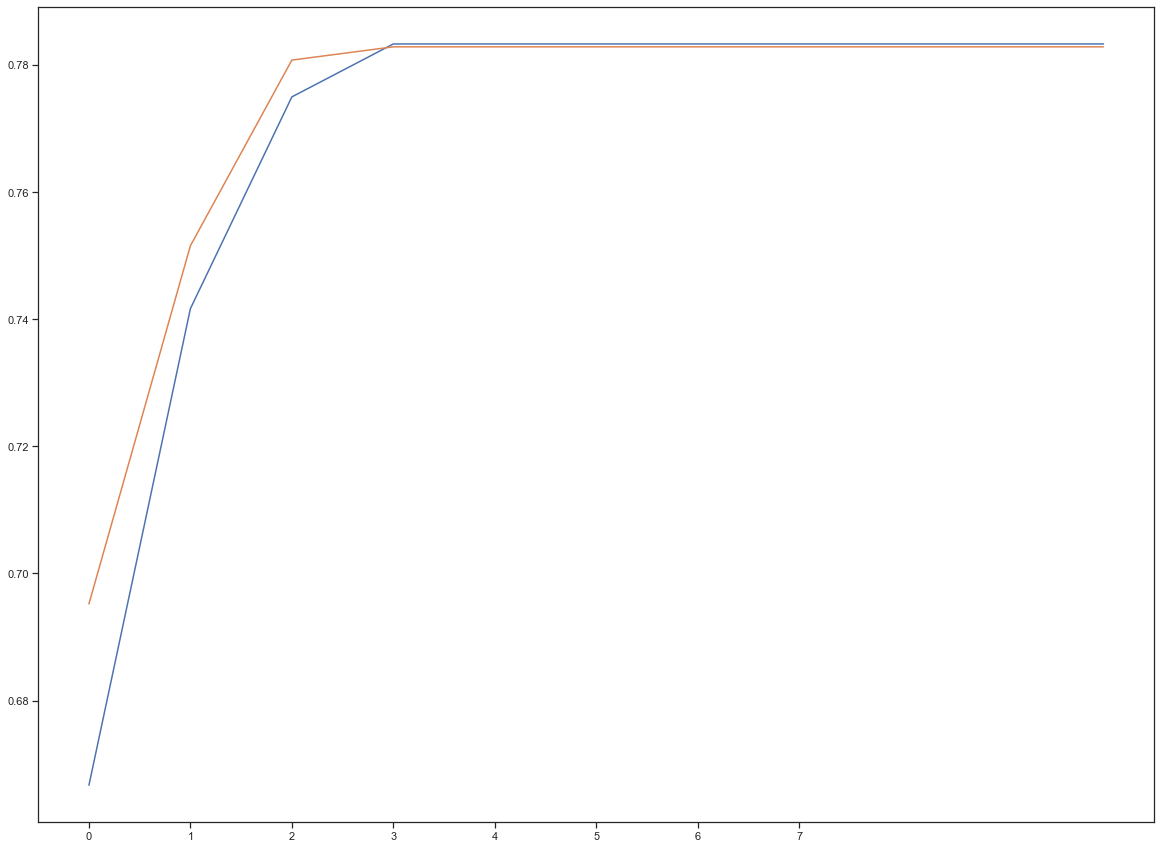

In [273]:
print(lF1Score)
print(lAccuracyScore)
plt.figure()
plt.plot(lF1Score)
plt.plot(lAccuracyScore)
plt.xticks(range(8),lMaxIter)
plt.show()